In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
pop = pd.read_csv('../Resources/population_2011_2018.csv')
pop.head()

,FIPS,State,Area_Name,Year,Population,Births,Deaths,InternationalMig,DomesticMig,CivilianLaborForce,UnemploymentRate
0,1000,AL,Alabama,2011,4798834,59689,48818,4716,-2239,2202670,9.6
1,2000,AK,Alaska,2011,722038,11702,3936,1320,-979,365913,7.6
2,4000,AZ,Arizona,2011,6473497,86103,48157,17126,10583,3037017,9.5
3,5000,AR,Arkansas,2011,2940407,38442,29463,3717,5504,1362682,8.3
4,6000,CA,California,2011,37641823,509763,238444,105527,-53949,18415100,11.7
5,8000,CO,Colorado,2011,5121771,65919,32015,12670,26255,2736079,8.4
6,9000,CT,Connecticut,2011,3588023,37642,29315,13027,-12343,1914775,8.8
7,10000,DE,Delaware,2011,907316,11301,7872,1556,2782,443346,7.5
8,11000,DC,District of Columbia,2011,619602,9199,4672,2429,7251,350778,10.2
9,12000,FL,Florida,2011,19093352,213213,174508,101645,106023,9300542,10.0


In [3]:
State='TX'
data= pop.groupby('State').get_group(State).reset_index() 
data.head(8)

,index,FIPS,State,Area_Name,Year,Population,Births,Deaths,InternationalMig,DomesticMig,CivilianLaborForce,UnemploymentRate
0,43,48000,TX,Texas,2011,25646227,381742,168090,71953,117054,12504498,7.8
1,94,48000,TX,Texas,2012,26089620,378109,169149,88080,143712,12670455,6.7
2,145,48000,TX,Texas,2013,26489464,384420,178632,83041,108849,12857595,6.3
3,196,48000,TX,Texas,2014,26977142,394325,180772,110340,160926,13039452,5.1
4,247,48000,TX,Texas,2015,27486814,402277,187892,121124,172520,13095837,4.4
5,298,48000,TX,Texas,2016,27937492,400968,188835,115228,122969,13347311,4.6
6,349,48000,TX,Texas,2017,28322717,395212,196396,103032,82801,13589208,4.3
7,400,48000,TX,Texas,2018,28701845,391451,200500,104976,82569,13848080,3.9


In [4]:
# Assign the data to X for six small models
X = data.Year.values.reshape(-1, 1)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
Year1=2019
Year2=2020
Year3=2021

In [5]:
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Births model Score: 0.4815674197353986
TX 2019 Births : 402370.5357142864
TX 2020 Births : 404883.3214285718
TX 2021 Births : 407396.1071428573


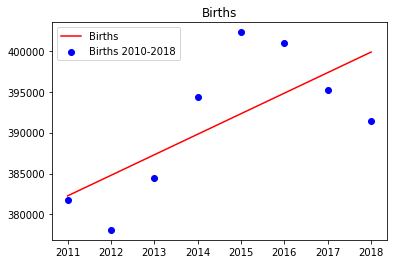

In [6]:
# fit the model to the Births data and predict
y=data.Births.values.reshape(-1, 1)
name="Births"
nameYear=name+" 2010-2018"
model.fit(X, y)
print(f"Births model Score: {model.score(X, y)}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue',label=nameYear)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red', label=name)
plt.legend()
plt.title(name)
predicted1 = model.predict([[Year1]])
predicted2 = model.predict([[Year2]])
predicted3 = model.predict([[Year3]])
print(f"{State} {Year1} {name} : {predicted1[(0,0)]}")
print(f"{State} {Year2} {name} : {predicted2[(0,0)]}")
print(f"{State} {Year3} {name} : {predicted3[(0,0)]}")
Births_predicted1=predicted1[0]
Births_predicted2=predicted2[0]
Births_predicted3=predicted3[0]

Deaths model Score: 0.9788950215573075
TX 2019 Deaths : 205256.5
TX 2020 Deaths : 210028.3333333321
TX 2021 Deaths : 214800.16666666605


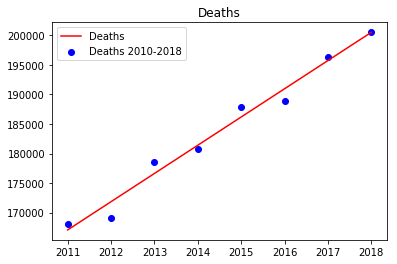

In [7]:
# fit the model to the Deaths data and predict
y=data.Deaths.values.reshape(-1, 1)
name="Deaths"
nameYear=name+" 2010-2018"
model.fit(X, y)
print(f"Deaths model Score: {model.score(X, y)}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue',label=nameYear)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red', label=name)
plt.legend()
plt.title(name)
predicted1 = model.predict([[Year1]])
predicted2 = model.predict([[Year2]])
predicted3 = model.predict([[Year3]])
print(f"{State} {Year1} {name} : {predicted1[(0,0)]}")
print(f"{State} {Year2} {name} : {predicted2[(0,0)]}")
print(f"{State} {Year3} {name} : {predicted3[(0,0)]}")
Deaths_predicted1=predicted1[0]
Deaths_predicted2=predicted2[0]
Deaths_predicted3=predicted3[0]

InternationalMig model Score: 0.4996329611334632
TX 2019 InternationalMig : 121861.0
TX 2020 InternationalMig : 126780.83333333209
TX 2021 InternationalMig : 131700.66666666605


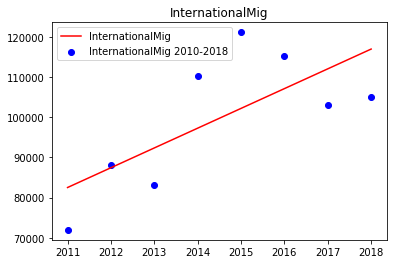

In [8]:
# fit the model to the InternationalMig data and predict
y=data.InternationalMig.values.reshape(-1, 1)
name="InternationalMig"
nameYear=name+" 2010-2018"
model.fit(X, y)
print(f"InternationalMig model Score: {model.score(X, y)}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue',label=nameYear)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red', label=name)
plt.legend()
plt.title(name)
predicted1 = model.predict([[Year1]])
predicted2 = model.predict([[Year2]])
predicted3 = model.predict([[Year3]])
print(f"{State} {Year1} {name} : {predicted1[(0,0)]}")
print(f"{State} {Year2} {name} : {predicted2[(0,0)]}")
print(f"{State} {Year3} {name} : {predicted3[(0,0)]}")
InternationalMig_predicted1=predicted1[0]
InternationalMig_predicted2=predicted2[0]
InternationalMig_predicted3=predicted3[0]

DomesticMig model Score: 0.18474629140834575
TX 2019 DomesticMig : 97568.0714285709
TX 2020 DomesticMig : 91710.97619047575
TX 2021 DomesticMig : 85853.8809523806


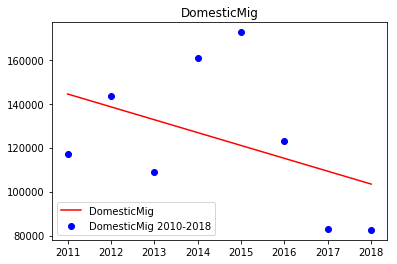

In [9]:
# fit the model to the DomesticMig data and predict
y=data.DomesticMig.values.reshape(-1, 1)
name="DomesticMig"
nameYear=name+" 2010-2018"
model.fit(X, y)
print(f"DomesticMig model Score: {model.score(X, y)}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue',label=nameYear)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red', label=name)
plt.legend()
plt.title(name)
predicted1 = model.predict([[Year1]])
predicted2 = model.predict([[Year2]])
predicted3 = model.predict([[Year3]])
print(f"{State} {Year1} {name} : {predicted1[(0,0)]}")
print(f"{State} {Year2} {name} : {predicted2[(0,0)]}")
print(f"{State} {Year3} {name} : {predicted3[(0,0)]}")
DomesticMig_predicted1=predicted1[0]
DomesticMig_predicted2=predicted2[0]
DomesticMig_predicted3=predicted3[0]

CivilianLaborForce model Score: 0.983396324723388
TX 2019 CivilianLaborForce : 13950717.285714269
TX 2020 CivilianLaborForce : 14135531.238095224
TX 2021 CivilianLaborForce : 14320345.19047618


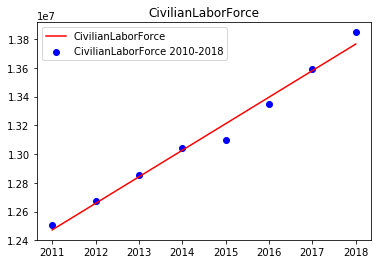

In [10]:
# fit the model to the CivilianLaborForce data and predict
y=data.CivilianLaborForce.values.reshape(-1, 1)
name="CivilianLaborForce"
nameYear=name+" 2010-2018"
model.fit(X, y)
print(f"CivilianLaborForce model Score: {model.score(X, y)}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue',label=nameYear)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red', label=name)
plt.legend()
plt.title(name)
predicted1 = model.predict([[Year1]])
predicted2 = model.predict([[Year2]])
predicted3 = model.predict([[Year3]])
print(f"{State} {Year1} {name} : {predicted1[(0,0)]}")
print(f"{State} {Year2} {name} : {predicted2[(0,0)]}")
print(f"{State} {Year3} {name} : {predicted3[(0,0)]}")
CivilianLaborForce_predicted1=predicted1[0]
CivilianLaborForce_predicted2=predicted2[0]
CivilianLaborForce_predicted3=predicted3[0]

UnemploymentRate model Score: 0.9002474119120636
TX 2019 UnemploymentRate : 2.9714285714285325
TX 2020 UnemploymentRate : 2.434523809523853
TX 2021 UnemploymentRate : 1.8976190476191732


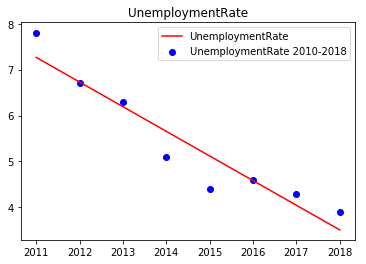

In [11]:
# fit the model to the UnemploymentRate data and predict
y=data.UnemploymentRate.values.reshape(-1, 1)
name="UnemploymentRate"
nameYear=name+" 2010-2018"
model.fit(X, y)
print(f"UnemploymentRate model Score: {model.score(X, y)}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue',label=nameYear)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red', label=name)
plt.legend()
plt.title(name)
predicted1 = model.predict([[Year1]])
predicted2 = model.predict([[Year2]])
predicted3 = model.predict([[Year3]])
print(f"{State} {Year1} {name} : {predicted1[(0,0)]}")
print(f"{State} {Year2} {name} : {predicted2[(0,0)]}")
print(f"{State} {Year3} {name} : {predicted3[(0,0)]}")
UnemploymentRate_predicted1=predicted1[0]
UnemploymentRate_predicted2=predicted2[0]
UnemploymentRate_predicted3=predicted3[0]

In [12]:
# use small predict model results for the final model input
X_prediction2019=pd.DataFrame({"Births": Births_predicted1,
                           "Deaths": Deaths_predicted1,
                           "InternationalMig": InternationalMig_predicted1,
                           "DomesticMig": DomesticMig_predicted1,
                           "CivilianLaborForce": CivilianLaborForce_predicted1,
                           "UnemploymentRate": UnemploymentRate_predicted1})
X_prediction2020=pd.DataFrame({"Births": Births_predicted2,
                           "Deaths": Deaths_predicted2,
                           "InternationalMig": InternationalMig_predicted2,
                           "DomesticMig": DomesticMig_predicted2,
                           "CivilianLaborForce": CivilianLaborForce_predicted2,
                           "UnemploymentRate": UnemploymentRate_predicted2})
X_prediction2021=pd.DataFrame({"Births": Births_predicted3,
                           "Deaths": Deaths_predicted3,
                           "InternationalMig": InternationalMig_predicted3,
                           "DomesticMig": DomesticMig_predicted3,
                           "CivilianLaborForce": CivilianLaborForce_predicted3,
                           "UnemploymentRate": UnemploymentRate_predicted3})

In [13]:
print(X_prediction2019)
print(X_prediction2020)
print(X_prediction2021)

          Births    Deaths  InternationalMig   DomesticMig  \
0  402370.535714  205256.5          121861.0  97568.071429   

   CivilianLaborForce  UnemploymentRate  
0        1.395072e+07          2.971429  
          Births         Deaths  InternationalMig  DomesticMig  \
0  404883.321429  210028.333333     126780.833333  91710.97619   

   CivilianLaborForce  UnemploymentRate  
0        1.413553e+07          2.434524  
          Births         Deaths  InternationalMig   DomesticMig  \
0  407396.107143  214800.166667     131700.666667  85853.880952   

   CivilianLaborForce  UnemploymentRate  
0        1.432035e+07          1.897619  


X y Shape:  (408, 6) (408, 1)
population model Score: 0.9993912115700335


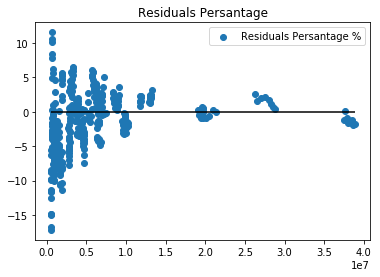

2019 population : 29325694
2020 population : 29703110
2021 population : 30080527


In [14]:
# Assign the data to X and y for the polulation model and fit
X = pop[["Births","Deaths","InternationalMig","DomesticMig","CivilianLaborForce","UnemploymentRate"]]
y = pop["Population"].values.reshape(-1, 1)
print("X y Shape: ", X.shape, y.shape)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(f"population model Score: {model.score(X, y)}")
# residual plot 
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, (predictions - y)/predictions*100 ,label="Residuals Persantage %")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.legend()
plt.title("Residuals Persantage")
plt.show()
predictions2019 = model.predict(X_prediction2019)
predictions2020 = model.predict(X_prediction2020)
predictions2021 = model.predict(X_prediction2021)
print(f"{Year1} population : {int(predictions2019[(0,0)])}")
print(f"{Year2} population : {int(predictions2020[(0,0)])}")
print(f"{Year3} population : {int(predictions2021[(0,0)])}")